In [598]:
%matplotlib inline

from pathlib import Path

import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots
from sklearn.metrics import mean_squared_error
from math import sqrt

In [599]:
sov = pd.read_csv('SouvenirSales.csv')

In [600]:
sovexpo = sov.copy()

In [601]:
sov.head()

,Date,Sales
0,Jan-95,1664.81
1,Feb-95,2397.53
2,Mar-95,2840.71
3,Apr-95,3547.29
4,May-95,3752.96


In [602]:
sov.tail()

,Date,Sales
79,Aug-01,28586.52
80,Sep-01,30505.41
81,Oct-01,30821.33
82,Nov-01,46634.38
83,Dec-01,104660.67


In [603]:
len(sov)

84

Based on the two time plots, the predictors that should be included in the regression model are: Sales, const, t and Month. The total number of predictors in the model is 4

In [604]:
#convert to time series
sov['Date'] = pd.to_datetime(sov.Date, format = '%b-%y')
sales_ts = pd.Series(sov.Sales.values, index=sov.Date, name = 'Sales')
sales_ts_index = pd.DatetimeIndex(sales_ts)

In [605]:
#MODEL A
#fit a linear model with monthly seasonality
sales_df = tsatools.add_trend(sales_ts, trend = 'ct')
sales_df['Month'] = sales_df.index.month

nValid = 12
nTrain = len(sales_ts) - nValid

#partition the data
train_df = sales_df[:nTrain]
valid_df = sales_df[nTrain:]

sales_lm_trendseason = sm.ols(formula = 'Sales ~ trend + C(Month)', data = train_df).fit()

In [606]:
sales_df

,Sales,const,trend,Month
Date,,,,
1995-01-01,1664.81,1.0,1.0,1
1995-02-01,2397.53,1.0,2.0,2
1995-03-01,2840.71,1.0,3.0,3
1995-04-01,3547.29,1.0,4.0,4
1995-05-01,3752.96,1.0,5.0,5
...,...,...,...,...
2001-08-01,28586.52,1.0,80.0,8
2001-09-01,30505.41,1.0,81.0,9
2001-10-01,30821.33,1.0,82.0,10


In [607]:
print(sales_lm_trendseason.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     18.53
Date:                Mon, 15 Jun 2020   Prob (F-statistic):           9.44e-16
Time:                        22:12:39   Log-Likelihood:                -720.48
No. Observations:                  72   AIC:                             1467.
Df Residuals:                      59   BIC:                             1497.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3065.5544   2640.262     -1.

The month which tends to have the highest average sales during the year is December. This is reasonable because customers spend more during december because of the holidays and festivity.

What does t = 245.36 mean?

In [608]:
#Regression model with an exponential trend and multiplicative seasonality
#convert to time series
sovexpo['Date'] = pd.to_datetime(sovexpo.Date, format = '%b-%y')
sovsales_ts = pd.Series(sovexpo.Sales.values, index=sovexpo.Date, name = 'Sales')
sovsales_ts_index = pd.DatetimeIndex(sovsales_ts)

In [609]:
#MODEL B
#fit a linear model with exponential trend and multiplicative seasonality
sovsales_df = tsatools.add_trend(sovsales_ts, trend = 'ct')
sovsales_df['Month'] = sovsales_df.index.month

nValid = 12
nTrain = len(sovsales_ts) - nValid

#partition the data
train_df = sovsales_df[:nTrain]
valid_df = sovsales_df[nTrain:]

sovsales_lm_trendseason = sm.ols(formula = 'np.log(Sales) ~ trend + C(Month)', data = train_df).fit()

Fitting a model to log(Sales) with a linear trend is equivalent to fitting a model to Sales (in dollars) with exponential trend

In [610]:
sovsales_lm_trendseason.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Sales)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     80.40
Date:                Mon, 15 Jun 2020   Prob (F-statistic):           6.21e-32
Time:                        22:12:40   Log-Likelihood:                 25.021
No. Observations:                  72   AIC:                            -24.04
Df Residuals:                      59   BIC:                             5.554
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.6464      0.084     90.898      0.000       7.478       7.815
C(Month)[T.2]      0.2820      0.109      2.587      0.012       0.064       0.500
C(Month)[T.3]      0.6950      0.109      6.374      0.000       0.477       0.913
C(Month)[T.4]      0.3739      0.109      3.428      0.001       0.156       0.592
C(Month)[T.5]      0.4217      0.109      3.865      0.000       0.203       0.640
C(Month)[T.6]      0.4470      0.109      4.095      0.000       0.229       0.665
C(Month)[T.7]      0.5834      0.109      5.341      0.000       0.365       0.802
C(Month)[T.8]      0.5469      0.109      5.004      0.000       0.328       0.766
C(Month)[T.9]      0.6356      0.109      5.811      0.000       0.417       0.854
C(Month)[T.10]     0.7295      0.109      6.664      0.000       0.510       0.949
C(Month)[T.11]     1.2010      0.110     10.961      0.000       0.982       1.420
C(Month)[T.12]     1.9522      0.110     17.800      0.000       1.733       2.172
trend              0.0211      0.001     19.449      0.000       0.019       0.023
==============================================================================
Omnibus:                        0.280   Durbin-Watson:                   1.036
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.465
Skew:                          -0.029   Prob(JB):                        0.793
Kurtosis:                       2.611   Cond. No.                         524.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model B has a trend coefficient of 0.02. What does this mean?

In [611]:
test_df = pd.DataFrame({'Date': ['2002-02-01'], 'const':[1.0], 'trend':[86.0], 'Month':[2]})
test_df = test_df.set_index('Date')

In [612]:
print(test_df)

            const  trend  Month
Date                           
2002-02-01    1.0   86.0      2


In [613]:
print(sovsales_lm_trendseason.predict(test_df).apply(lambda row: math.exp(row)))

Date
2002-02-01    17062.993888
dtype: float64


The forecasted sales for February, 2002 is 17063

In [614]:
print(sovsales_lm_trendseason.predict(valid_df).apply(lambda row: math.exp(row)), valid_df)

Date
2001-01-01     9780.022166
2001-02-01    13243.094764
2001-03-01    20441.748596
2001-04-01    15143.540765
2001-05-01    16224.627710
2001-06-01    16996.137383
2001-07-01    19894.423692
2001-08-01    19591.111546
2001-09-01    21864.492284
2001-10-01    24530.299105
2001-11-01    40144.774901
2001-12-01    86908.868184
dtype: float64                 Sales  const  trend  Month
Date                                      
2001-01-01   10243.24    1.0   73.0      1
2001-02-01   11266.88    1.0   74.0      2
2001-03-01   21826.84    1.0   75.0      3
2001-04-01   17357.33    1.0   76.0      4
2001-05-01   15997.79    1.0   77.0      5
2001-06-01   18601.53    1.0   78.0      6
2001-07-01   26155.15    1.0   79.0      7
2001-08-01   28586.52    1.0   80.0      8
2001-09-01   30505.41    1.0   81.0      9
2001-10-01   30821.33    1.0   82.0     10
2001-11-01   46634.38    1.0   83.0     11
2001-12-01  104660.67    1.0   84.0     12


In [615]:
predictions = sovsales_lm_trendseason.predict(valid_df).apply(lambda row: math.exp(row))

In [616]:
# evaluate performance
mse = mean_squared_error(valid_df['Sales'], predictions)
rmse = sqrt(mse)
print(rmse)

7101.444191251929


In [617]:
print(sales_lm_trendseason.predict(valid_df), valid_df)

Date
2001-01-01    14846.030250
2001-02-01    16210.778583
2001-03-01    19745.603583
2001-04-01    17044.690250
2001-05-01    17273.681917
2001-06-01    17940.828583
2001-07-01    19306.778583
2001-08-01    19791.160250
2001-09-01    20764.503583
2001-10-01    21875.965250
2001-11-01    28824.310250
2001-12-01    50014.586917
dtype: float64                 Sales  const  trend  Month
Date                                      
2001-01-01   10243.24    1.0   73.0      1
2001-02-01   11266.88    1.0   74.0      2
2001-03-01   21826.84    1.0   75.0      3
2001-04-01   17357.33    1.0   76.0      4
2001-05-01   15997.79    1.0   77.0      5
2001-06-01   18601.53    1.0   78.0      6
2001-07-01   26155.15    1.0   79.0      7
2001-08-01   28586.52    1.0   80.0      8
2001-09-01   30505.41    1.0   81.0      9
2001-10-01   30821.33    1.0   82.0     10
2001-11-01   46634.38    1.0   83.0     11
2001-12-01  104660.67    1.0   84.0     12


In [618]:
predictions = sales_lm_trendseason.predict(valid_df)

In [619]:
# evaluate performance
mse = mean_squared_error(valid_df['Sales'], predictions)
rmse = sqrt(mse)
print(rmse)

17451.546874704054


Model B is more preferable for forecasting than model A because the RMSE for model B is way lower than the RMSE for model A.

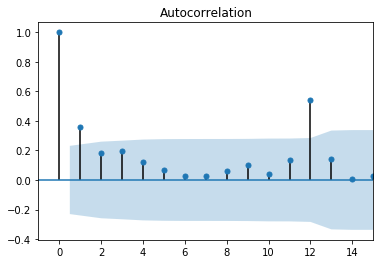

In [620]:
residual = train_df.Sales - sovsales_lm_trendseason.predict(train_df)
tsaplots.plot_acf(residual)
plt.xlim(-1, 15)
plt.show()

In [627]:
formula = 'np.log(Sales) ~ trend + C(Month)'
train_lm_trendseason = sm.ols(formula=formula, data=sales_df).fit()
train_res_arima = ARIMA(train_lm_trendseason.resid, order=(2, 0, 0), freq='MS').fit(trend='nc', disp=0)
forecast, _, conf_int = train_res_arima.forecast(1)

print(train_res_arima.summary())
print(pd.DataFrame({'coef': train_res_arima.params, 'std err': train_res_arima.bse}))

print(forecast)
print('Forecast {0:.3f} [{1[0][0]:.3f}, {1[0][1]:.3f}]'.format(forecast, conf_int))

print(train_lm_trendseason.resid[-1])

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   84
Model:                     ARMA(2, 0)   Log Likelihood                  46.276
Method:                       css-mle   S.D. of innovations              0.139
Date:                Mon, 15 Jun 2020   AIC                            -86.553
Time:                        22:21:21   BIC                            -79.260
Sample:                    01-01-1995   HQIC                           -83.621
                         - 12-01-2001                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.3488      0.103      3.392      0.001       0.147       0.550
ar.L2.y        0.3182      0.103      3.088      0.002       0.116       0.520
                                    Roots           

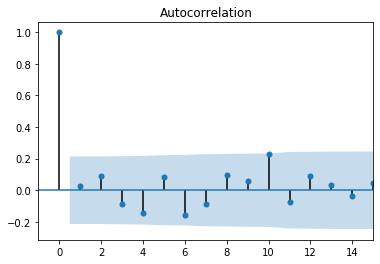

[ 1.          0.36055564  0.18332461  0.19477838  0.11998924  0.06533403
  0.02733865  0.02364468  0.05866166  0.1034218   0.0388536   0.13412591
  0.54117933  0.14317799  0.00741333  0.02795173  0.00184762 -0.02227036
 -0.03923948 -0.03416015 -0.0206428   0.00980796 -0.04343001  0.0309576
  0.33800249  0.0526398  -0.05857443 -0.03658423 -0.05838221 -0.06869791
 -0.07364617 -0.05892378 -0.04744476  0.00458061 -0.05270328  0.01578441
  0.27324518  0.01512039 -0.05902759 -0.05487444 -0.07113336]


In [628]:
tsaplots.plot_acf(train_res_arima.resid)
plt.xlim(-1, 15)
plt.show()
print(stattools.acf(residual, fft=False))

In [623]:
test_df = pd.DataFrame({'Date': ['2002-01-01'], 'const':[1.0], 'trend':[85.0], 'Month':[1]})
test_df = test_df.set_index('Date')

In [624]:
print(sovsales_lm_trendseason.predict(test_df).apply(lambda row: math.exp(row)))

Date
2002-01-01    12601.016713
dtype: float64


In [625]:
print('The Forecast for January is: ',12601.017 + 0.066,'Sales')

The Forecast for January is:  12601.083 Sales
